In [11]:
# read pdf Example paper 1.pdf

import PyPDF2

pdf_path = 'Example paper 1.pdf'

pdfFileObj = open('Example paper 1.pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObj)
len(pdfReader.pages)

117

In [12]:
import re

def extract_compounds(text, page = -1):
    pattern = r'([\w()-]+)\s*-\s*([\w-]+)-\d-\([\w\[\](),\s-]+\)([\w\s]+)\((\d+)\)'
    matches = re.findall(pattern, text)
    extracted_data = []
    for match in matches:
        compound = {
            'Page' : page + 1,
            'Prefix': match[0],
            'Core': match[1],
            'Suffix': match[2],
            'Compound Number': match[3]
        }
        extracted_data.append(compound)
    
    return extracted_data

compounds = []
for page in range(len(pdfReader.pages)):
    pageObj = pdfReader.pages[page]
    text = pageObj.extract_text()
    compound = extract_compounds(text, page)
    compounds.extend(compound)

compounds[0]

{'Page': 7,
 'Prefix': '2',
 'Core': 'amino',
 'Suffix': 'propanoic acid hydrochloride ',
 'Compound Number': '1'}

In [13]:
# Sample text from a PDF (replace this with actual PDF text)
pdf_text = """
Here are some compounds:
(S)-2-amino-3-(4-(but-2-yn-1-yloxy)phenyl)propanoic acid hydrochloride (2)
(S)-2-amino-3-(4-(2-azidoethoxy)phenyl)propanoic acid hydrochloride (2)
4.2.3 (S)-2-amino-3-(4-(2-azidoethoxy)phenyl)propanoic acid hydrochloride (2)
4.3.4 Methyl 2-acetamido-3-(3-(pentyloxy)phenyl)propanoate (31)
4.5.5 2-amino-3-(3-(hexyloxy)phenyl)propanoic acid hydrochloride (10)
4.8.1 2-amino-3-(3-propionylphenyl)propanoic acid hydrochloride (12)
"""

# Extract compounds
result = extract_compounds(pdf_text)
result[0]

{'Page': 0,
 'Prefix': '(S)-2',
 'Core': 'amino',
 'Suffix': 'propanoic acid hydrochloride ',
 'Compound Number': '2'}

CC(=O)Oc1cccc(C(C)C(=O)O)c1


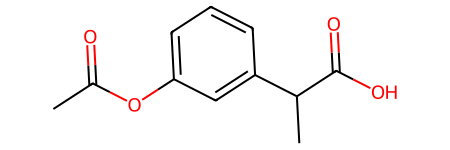

In [14]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC(=C1)C(C)C(=O)O')
print(Chem.MolToSmiles(mol))
mol

In [18]:
from openbabel import pybel

def iupac_to_smiles(iupac_name):
    mol = pybel.readstring("name", iupac_name)
    return mol.write("smi").strip()

iupac_name = "4-aminobutyric acid"
smiles_string = iupac_to_smiles(iupac_name)
print(f"The SMILES string for {iupac_name} is {smiles_string}")

from py2opsin import py2opsin

smiles_string = py2opsin(
    chemical_name="4-aminobutyric acid",
    output_format="SMILES"
)
print(f"The SMILES string for 4-aminobutyric acid is {smiles_string}")

ModuleNotFoundError: No module named 'openbabel'

In [17]:
import requests
from functools import cache

from urllib.request import urlopen
from urllib.parse import quote
import timeit 

@cache
def iupac_to_smiles1(iupac_name):
    iupac_name = iupac_name.strip()
    if not iupac_name:
        return None
    try:
        url = f'http://cactus.nci.nih.gov/chemical/structure/{iupac_name}/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return iupac_to_smiles1(iupac_name[1:])

@cache
def iupac_to_smiles2(iupac_name):
    iupac_name = iupac_name.strip()
    url = f"https://opsin.ch.cam.ac.uk/opsin/{iupac_name}.smi"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text.strip()
    elif iupac_name:
        return iupac_to_smiles2(iupac_name[1:])
    return None

iupac_name = "(R/S)-4-amino-3-hydroxy butyric acid"
smiles = iupac_to_smiles1(iupac_name)
# print(timeit.timeit(f'iupac_to_smiles1("{iupac_name}")', globals=globals(), number=10))
# print(timeit.timeit(f'iupac_to_smiles2("{iupac_name}")', globals=globals(), number=10))
smiles


'CCN(CC)C(=O)[C@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(C2=C1)c34'

In [ ]:
import pandas as pd

data = pd.read_csv('SURP-database-reformatted - Flexizymes ready for database.csv', skiprows=1)

SMILES = []
for iupac in data['Monomer Names (required)']:
    method1, method2 = iupac_to_smiles1(iupac), iupac_to_smiles2(iupac)
    SMILES.append({
        'IUPAC': iupac,
        'SMILES1': method1,
        'SMILES2': method2
    })

In [30]:
# put into new csv
SMILES_df = pd.DataFrame(SMILES)
SMILES_df.to_csv('IUPAC_TO_SMILES.csv')